<a href="https://colab.research.google.com/github/amriT2044524/its_live_himalaya/blob/main/its_live_velocity_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/nasa-jpl/itslive-py/blob/main/notebooks/introduction.ipynb

In [3]:
# !pip install itslive

In [4]:
import itslive

import matplotlib.pyplot as plt
from datetime import date

itslive.__version__ #'0.3.2'

'0.3.2'

In [13]:
# points=[(-45.1, 73.1),
#         (-45.3, 70.1),
#         (-46.1, 71.2)]

points=[(82.083661,30.181052)]

velocities = itslive.velocity_cubes.get_time_series(points=points)

print(f"{len(velocities)} time series found")
# Velocities is now an array with time series for each lat,lon pair
velocities[0]["time_series"]

1 time series found


<xarray.Dataset> Size: 7MB
Dimensions:         (mid_date: 128126)
Coordinates:
  * mid_date        (mid_date) datetime64[ns] 1MB 2021-12-16T17:06:55.2109196...
    x               float64 8B 6.044e+05
    y               float64 8B 3.339e+06
Data variables:
    v               (mid_date) float32 513kB ...
    vx              (mid_date) float32 513kB ...
    v_error         (mid_date) float32 513kB ...
    date_dt         (mid_date) timedelta64[ns] 1MB ...
    satellite_img1  (mid_date) <U2 1MB ...
    vy_error        (mid_date) float32 513kB ...
    vx_error        (mid_date) float32 513kB ...
    mission_img1    (mid_date) <U1 513kB ...
    vy              (mid_date) float32 513kB ...
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               03-Oct-2023 03:54:39
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2-updated-octob...
    skipped_granules:           s3://its-live-data/datacubes/v2-updated-octob...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

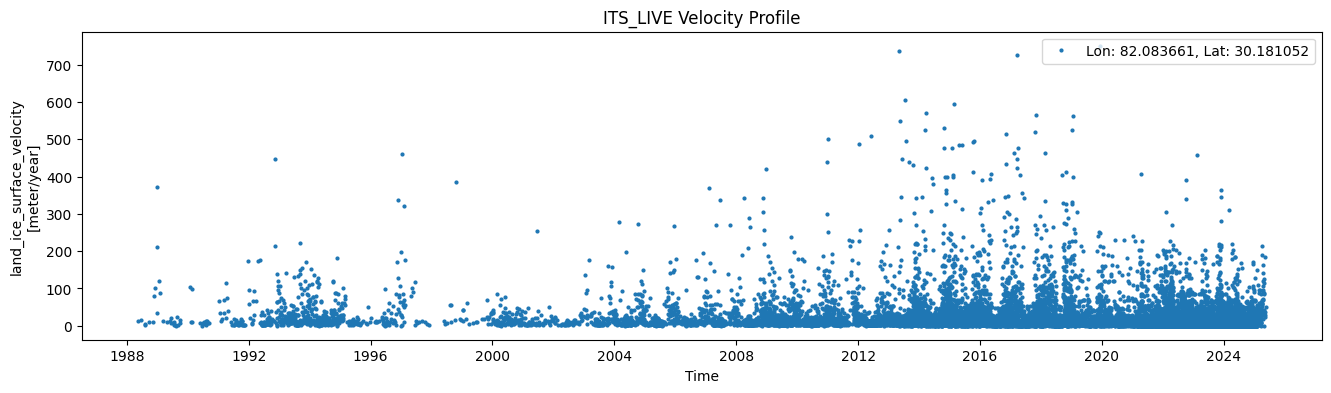

In [23]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (16, 4)
fig, ax = plt.subplots()

color_index = 0

for vel in velocities:
    latitude = vel["requested_point_geographic_coordinates"][1]
    longitude = vel["requested_point_geographic_coordinates"][0]

    point_label = f"Lon: {longitude}, Lat: {latitude}"
    vel["time_series"].v.plot(ax=ax,
                              linestyle="None",
                              marker="o",
                              markersize=2,
                              c=plt.cm.tab10(color_index),
                              label=point_label,
                              add_legend=True)
    color_index+=1

plt.xlabel("Time")
plt.title("ITS_LIVE Velocity Profile")
ax.legend(loc="upper right")

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Ensure matplotlib plots inline (if in a notebook)
%matplotlib inline

# --- 1. Prepare Data for Plotting ---

all_data_frames = []

# Loop through each velocity object
for vel in velocities:
    # Get the xarray DataArray for velocity
    ts_data_array = vel["time_series"].v

    # Convert it to a pandas DataFrame.
    # 'time' will be the index, 'velocity' will be the column.
    df = ts_data_array.to_dataframe(name='velocity')

    # Extract the year from the 'time' index and add it as a new column
    df['year'] = df.index.year

    # --- ADDED THESE TWO LINES ---
    df['month'] = df.index.month       # Store the month (1-12)
    df['doy'] = df.index.dayofyear  # Store the day of year (1-366)

    # Create the point label (rounding for a cleaner legend)
    latitude = vel["requested_point_geographic_coordinates"][1]
    longitude = vel["requested_point_geographic_coordinates"][0]
    point_label = f"Lon: {longitude:.2f}, Lat: {latitude:.2f}"

    # Add the label as a new column
    df['point'] = point_label

    # Add this DataFrame to our list
    all_data_frames.append(df)

# Combine all the individual DataFrames into one
combined_df = pd.concat(all_data_frames, ignore_index=True)

# You can check the new columns by inspecting the DataFrame:
print(combined_df.head())

          x          y  velocity  year  month  doy                   point
0  604372.5  3339307.5       4.0  2021     12  350  Lon: 82.08, Lat: 30.18
1  604372.5  3339307.5       NaN  2022      5  150  Lon: 82.08, Lat: 30.18
2  604372.5  3339307.5       NaN  2018      8  241  Lon: 82.08, Lat: 30.18
3  604372.5  3339307.5      24.0  2022     11  330  Lon: 82.08, Lat: 30.18
4  604372.5  3339307.5       NaN  2022      8  240  Lon: 82.08, Lat: 30.18


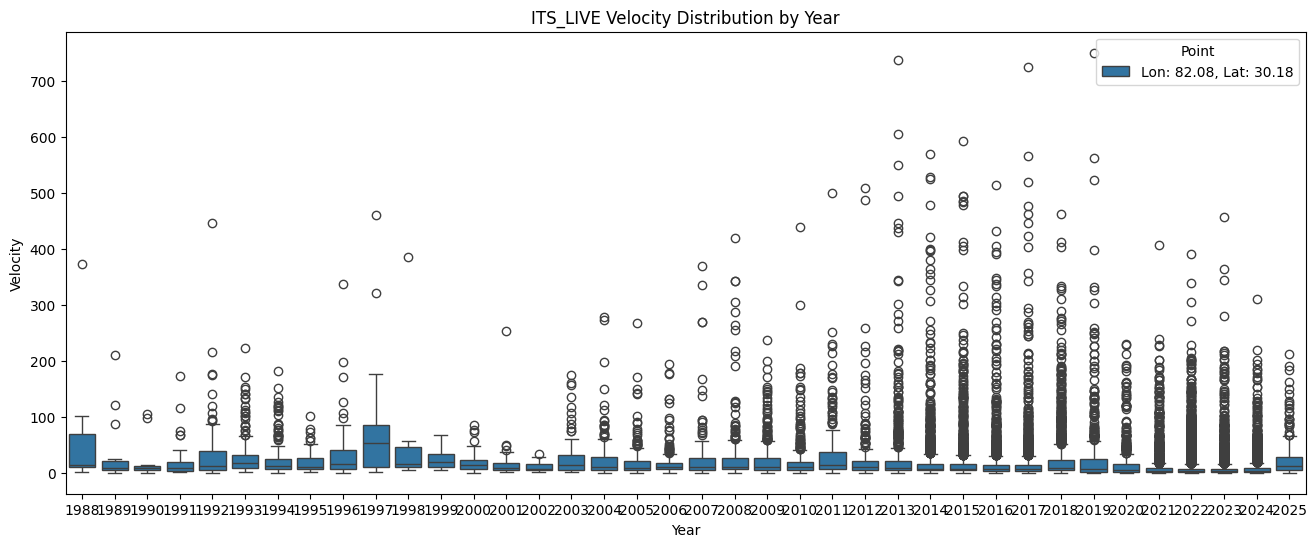

In [32]:
# --- 2. Create the Box Plot ---

# Set figure size (you might want it taller for a box plot)
plt.rcParams["figure.figsize"] = (16, 6)
fig, ax = plt.subplots()

# Create the boxplot using seaborn
# x-axis is the year
# y-axis is the velocity
# 'hue' splits the boxes by the 'point' label
sns.boxplot(data=combined_df, x='year', y='velocity', hue='point', ax=ax)

# --- 3. Customize the Plot ---

plt.xlabel("Year")
plt.ylabel("Velocity") # Add a Y-axis label
plt.title("ITS_LIVE Velocity Distribution by Year")
ax.legend(loc="upper right", title="Point") # Title the legend

plt.show()

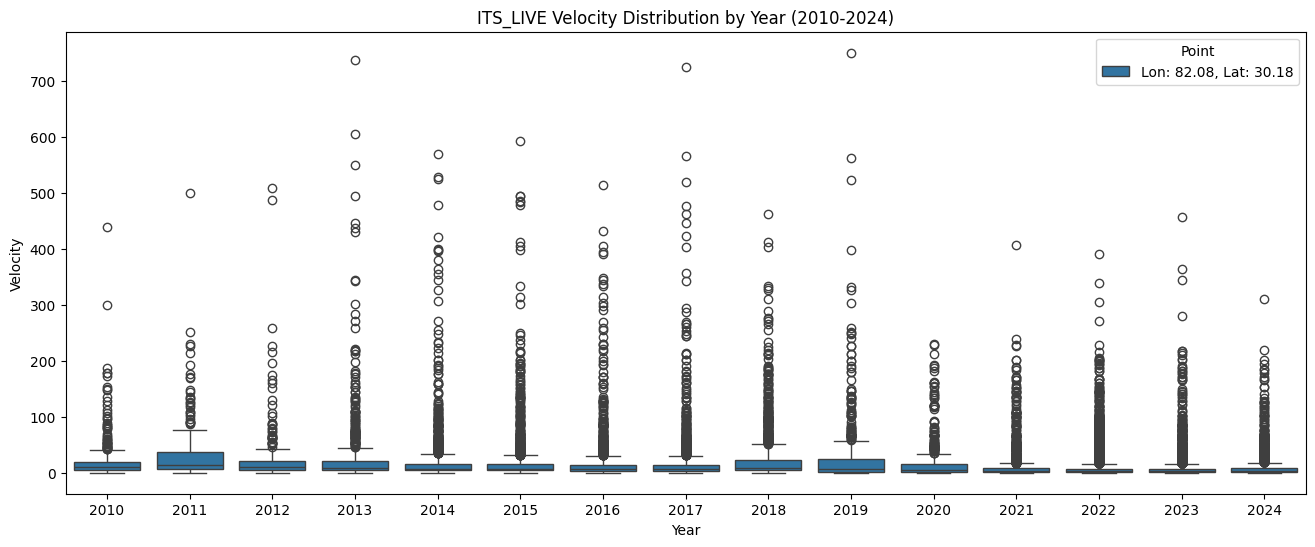

In [33]:
# --- 2. Filter the DataFrame for the desired date range ---
filtered_df = combined_df[
    (combined_df['year'] >= 2010) & (combined_df['year'] <= 2024)
].copy() # Using .copy() avoids a SettingWithCopyWarning

# --- 3. Create the Box Plot ---

# Set figure size
plt.rcParams["figure.figsize"] = (16, 6)
fig, ax = plt.subplots()

# Create the boxplot using the *filtered* data
sns.boxplot(data=filtered_df, x='year', y='velocity', hue='point', ax=ax)

# --- 4. Customize the Plot ---

plt.xlabel("Year")
plt.ylabel("Velocity")
plt.title("ITS_LIVE Velocity Distribution by Year (2010-2024)")
ax.legend(loc="upper right", title="Point")

plt.show()

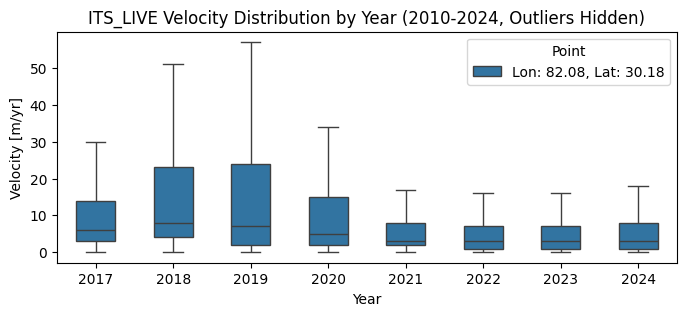

In [34]:
# --- 2. Filter the DataFrame for the desired date range ---
s_year=2017
e_year=2024
filtered_df = combined_df[
    (combined_df['year'] >= s_year) & (combined_df['year'] <= e_year)
].copy() # Using .copy() avoids a SettingWithCopyWarning

# --- 3. Create the Box Plot (Without Outliers) ---

# Set figure size
plt.rcParams["figure.figsize"] = (8, 3)
fig, ax = plt.subplots()

# Create the boxplot using the filtered data
# Add 'showfliers=False' to hide the outliers
sns.boxplot(
    data=filtered_df,
    x='year',
    y='velocity',
    hue='point',
    width=0.5,
    showfliers=False,  # <-- This is the new parameter
    ax=ax
)

# --- 4. Customize the Plot ---

plt.xlabel("Year")
plt.ylabel("Velocity [m/yr]")
plt.title("ITS_LIVE Velocity Distribution by Year (2010-2024, Outliers Hidden)")
ax.legend(loc="upper right", title="Point")

plt.show()

In [35]:
filtered_df.head()

,x,y,velocity,year,month,doy,point
0,604372.5,3339307.5,4.0,2021,12,350,"Lon: 82.08, Lat: 30.18"
1,604372.5,3339307.5,NaN,2022,5,150,"Lon: 82.08, Lat: 30.18"
2,604372.5,3339307.5,NaN,2018,8,241,"Lon: 82.08, Lat: 30.18"
3,604372.5,3339307.5,24.0,2022,11,330,"Lon: 82.08, Lat: 30.18"
4,604372.5,3339307.5,NaN,2022,8,240,"Lon: 82.08, Lat: 30.18"


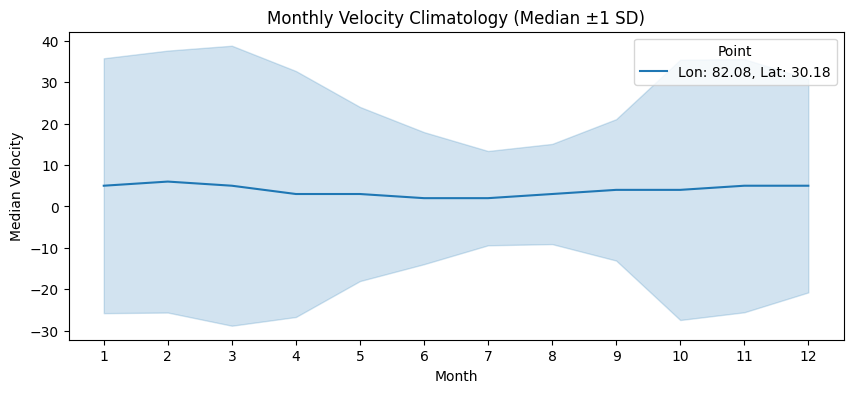

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Need numpy for the median estimator

# --- 1. Set up the Plot ---
plt.rcParams["figure.figsize"] = (10, 4)
fig, ax = plt.subplots()

# --- 2. Create the Monthly Climatology Line Plot ---
# We use the full 'combined_df' to calculate the climatology
sns.lineplot(
    data=filtered_df,    # Use the main dataframe
    x='month',           # X-axis is the month
    y='velocity',        # Y-axis is the velocity
    hue='point',         # Create a separate line for each point
    estimator=np.median, # Calculate the median for the central line
    errorbar='sd',       # Show +/- 1 standard deviation as the ribbon
    ax=ax
)

# --- 3. Customize the Plot ---
plt.xlabel("Month")
plt.ylabel("Median Velocity")
plt.title("Monthly Velocity Climatology (Median ±1 SD)")
ax.legend(loc="upper right", title="Point")

# Set the x-axis ticks to be integers from 1 to 12
plt.xticks(range(1, 13))

plt.show()

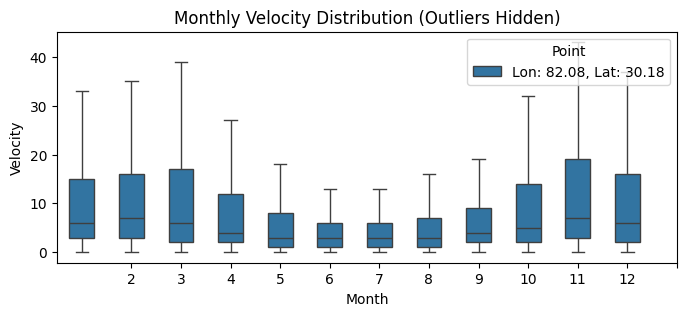

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Set up the Plot ---
plt.rcParams["figure.figsize"] = (8, 3)
fig, ax = plt.subplots()

# --- 2. Create the Monthly Box Plot ---
# We use the full 'combined_df'
sns.boxplot(
    data=combined_df,    # Use the main dataframe
    x='month',           # X-axis is the month
    y='velocity',        # Y-axis is the velocity
    hue='point',         # Create a separate box for each point
    showfliers=False,    # Hide outliers
    width=0.5,
    ax=ax
)

# --- 3. Customize the Plot ---
plt.xlabel("Month")
plt.ylabel("Velocity")
plt.title("Monthly Velocity Distribution (Outliers Hidden)")
ax.legend(loc="upper right", title="Point")

# Set the x-axis ticks to be integers from 1 to 12
plt.xticks(range(1, 13))

plt.show()
